# Actividad 2: DBScan

Se acerca la primavera y con esto te dan ganas de aprender más acerca de flores. Te das cuenta que existen algunas características que ayudan a diferenciar de mejor manera algunas flores🌼🌻🌷. 

Como estas dando el curso de Minería de Datos, quieres probar si tu trabajo de diferenciar flores se hace más fácil al usar alguna técnica de agrupación.

## ¿Qué es DBScan?
Explica con tus palabras qué es DBSCAN, puedes guiarte por la materia del curso y te recomendamos este [video](https://www.youtube.com/watch?v=RDZUdRSDOok) si tienes dudas o quieres confirmar tu conocimiento.
(Cómo funciona y para qué se usa)

El DBSCAN lo que hace es tomar una muestra random y encontrar muestras cercanas hasta que ya no hayan más. Una vez con este grupo hecho se procede a hacer el mismo procedimiento en otro grupo. Los puntos que no pertenezcan a ningún grupo son considerados outliers. Este algoritmo es muy utilizado para clusterizar debido a su eficiencia y a que detecta de buena manera grupos que no son linealmente separables. Esto lo diferencia de otros algoritmos como K-Means.

## Lectura y preprocesamiento de datos

Para esta actividad usaremos el dataset Iris, que tiene información sobre los pétalos y tallos de diferentes flores. Y visualirazemos cómo se ven con DBScan.

In [1]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
X = iris['data']
y = iris['target']
X = X[['sepal length (cm)','petal length (cm)', 'petal width (cm)', 'sepal width (cm)']]
X

,sepal length (cm),petal length (cm),petal width (cm),sepal width (cm)
0,5.1,1.4,0.2,3.5
1,4.9,1.4,0.2,3.0
2,4.7,1.3,0.2,3.2
3,4.6,1.5,0.2,3.1
4,5.0,1.4,0.2,3.6
...,...,...,...,...
145,6.7,5.2,2.3,3.0
146,6.3,5.0,1.9,2.5
147,6.5,5.2,2.0,3.0
148,6.2,5.4,2.3,3.4


In [2]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

### Preprocesamiento de los datos

### Reducción de dimensionalidad
Para ver mejor cómo se distribuyen los datos disminuiremos su dimensionalidad con PCA a 2 dimensiones y deberás visualizarlos en un gráfico.

In [3]:
from sklearn.decomposition import PCA

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Ahora grafica los datos en 2 dimensiones, usando como grupos las clasificaciones entregadas en la variable y.

In [4]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
pca_n2 = pd.DataFrame(data = principalComponents
             , columns = ['component 1', 'component 2'])
pca_n2.head()

,component 1,component 2
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755


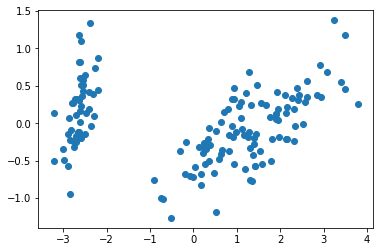

In [5]:
plt.scatter(pca_n2['component 1'], pca_n2['component 2'])

## DBSCAN
Utiliza la función de dbscan que tiene sklearn para utilizar sobre este conjunto y grafica los grupos que predice.

In [6]:
from sklearn.cluster import DBSCAN


Se utilizó https://medium.com/@plog397/functions-to-plot-kmeans-hierarchical-and-dbscan-clustering-c4146ed69744

In [7]:
db = DBSCAN()
db.fit(X)
y_pred = db.fit_predict(X)
X.insert(0, "label", y_pred, True)

In [8]:
grupos = X.groupby(by='label').mean()
grupos

,sepal length (cm),petal length (cm),petal width (cm),sepal width (cm)
label,,,,
-1,6.364706,4.982353,1.617647,2.717647
0,5.016327,1.465306,0.244898,3.451020
1,6.220238,4.847619,1.671429,2.896429


<AxesSubplot:xlabel='label'>

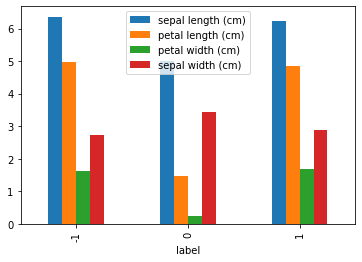

In [9]:
grupos.plot(y=['sepal length (cm)','petal length (cm)', 'petal width (cm)', 'sepal width (cm)'], kind='bar')

Se puede ver la diferencia promedio del grupo 0 y 1 en las 4 categorías. El grupo 0 es menor en todo menos en sepal width.

Ahora vuelve a hacer pca para poder visualizar los datos, pero esta vez usando como grupos los datos entregados por dbscan.

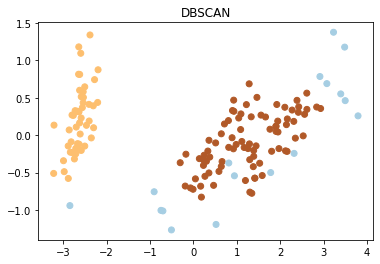

In [10]:
plt.scatter(pca_n2.iloc[:,0], pca_n2.iloc[:,1],c=y_pred, cmap='Paired')
plt.title("DBSCAN")
plt.show()

### Análisis de resultados
Para esto caso, ¿crees que funcióno DBScan?¿Por qué?

Si, ya que se ve claramente que se reconocen 2 clusters. El scatter plot concuerda con el realizado anteriormente pero esta vez segmentado por clusters. Un pequeño error del cluster puede ser que se ven outliers muy encima de grupos, pero esto lo arreglaremos en el transcurso de la actividad modificando los parámetros del DBSCAN.

### Estudio de hiperparámetros

Lee acerca de los hiperparámetros de DBSCAN en la documentación. Cambia como mínimo ```eps``` y ```min_samples```. Haz al menos 5 gráficos.


*   ¿Qué cambios puedes ver en los gráficos?
*   ¿Qué significan estos parámetros y en qué afectan al algoritmo?


In [11]:
X = X.drop(labels='label', axis=1)

In [12]:
db = DBSCAN(eps=0.4, min_samples=4)
db.fit(X)
y_pred = db.fit_predict(X)

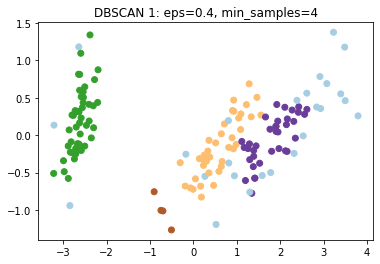

In [13]:
plt.scatter(pca_n2.iloc[:,0], pca_n2.iloc[:,1],c=y_pred, cmap='Paired')
plt.title("DBSCAN 1: eps=0.4, min_samples=4")
plt.show()

In [14]:
db = DBSCAN(eps=0.6, min_samples=6)
db.fit(X)
y_pred = db.fit_predict(X)

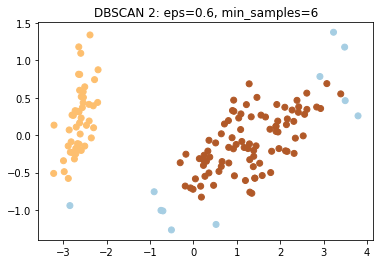

In [15]:
plt.scatter(pca_n2.iloc[:,0], pca_n2.iloc[:,1],c=y_pred, cmap='Paired')
plt.title("DBSCAN 2: eps=0.6, min_samples=6")
plt.show()

In [16]:
db = DBSCAN(eps=0.62, min_samples=5)
db.fit(X)
y_pred = db.fit_predict(X)

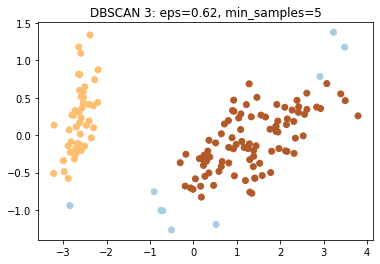

In [17]:
plt.scatter(pca_n2.iloc[:,0], pca_n2.iloc[:,1],c=y_pred, cmap='Paired')
plt.title("DBSCAN 3: eps=0.62, min_samples=5")
plt.show()

In [18]:
db = DBSCAN(eps=0.9, min_samples=5)
db.fit(X)
y_pred = db.fit_predict(X)

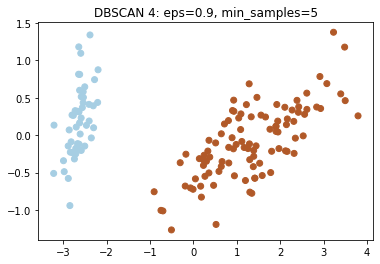

In [19]:
plt.scatter(pca_n2.iloc[:,0], pca_n2.iloc[:,1],c=y_pred, cmap='Paired')
plt.title("DBSCAN 4: eps=0.9, min_samples=5")
plt.show()

In [20]:
db = DBSCAN(eps=0.6, min_samples=4)
db.fit(X)
y_pred = db.fit_predict(X)

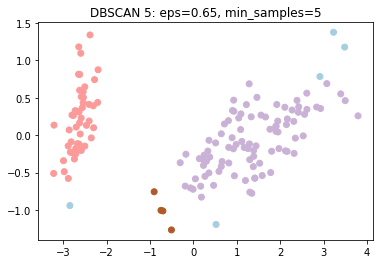

In [21]:
plt.scatter(pca_n2.iloc[:,0], pca_n2.iloc[:,1],c=y_pred, cmap='Paired')
plt.title("DBSCAN 5: eps=0.65, min_samples=5")
plt.show()

Podemos ver diferente cantidad de grupos en cada clusterización. El cluster 1 tuvo 4 grupos más outliers, el 2 y el 3 tuvieron 2 grupos más outliers, el 4 1 grupo más outliers y el 5 tuvo 3 grupos y los outliers. Además se puede ver que el cluster original que se utilizó tiene los valores defectos (eps=0.5 y min_samples=5).

El parámetro eps representa la distancia máxima entre dos muestras para que una se considere en la vecindad de la otra. Mientras tanto el parámetro min_samples es el número de muestras en una vecindad para que un punto se considere un punto central. Si eps es mayor se considerarán puntos más lejanos en un grupo, mientras que si es menor se considerarán puntos más cercanos. Si el número de min_samples disminuye habrán más grupos, mientras que si aumenta habrán menos grupos.